In [1]:
# !pip install tensorflow
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as kf
import math

In [3]:
# reading data from csv file
df = pd.read_csv('./phishing_data.csv')

In [4]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,zero,3,zero,0,1,0,0,...,1,one,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate


In [5]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,zero,3,zero,0,1,0,0,...,1,one,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate


In [6]:
# dropping the url column and storing in a new data dataframe 'data'
data = df.drop(['url'], axis = 1)

In [7]:
data.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,46,20,zero,3,zero,0,1,0,0,1,...,1,one,0,627,6678,78526,0,0,5,phishing
1,128,120,0,10,0,0,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,52,25,0,3,0,0,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
3,21,13,0,2,0,0,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
4,28,19,0,2,0,0,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate


In [8]:
# printing the shape of data
data.shape

(11481, 88)

# Datatype Handling

In [9]:
# dropping all the columns which has only one unique values
for i in data.columns[:-1]:
    if len(data[i].value_counts()) == 1:
        data = data.drop([i], axis = 1)

In [10]:
data.shape

(11481, 82)

In [11]:
# checking whether there is any missing value in the dataframe or not
data.isnull().values.any()

False

In [12]:
#Displaying a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11481 entries, 0 to 11480
Data columns (total 82 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11481 non-null  int64  
 1   length_hostname             11481 non-null  int64  
 2   ip                          11481 non-null  object 
 3   nb_dots                     11481 non-null  int64  
 4   nb_hyphens                  11481 non-null  object 
 5   nb_at                       11481 non-null  int64  
 6   nb_qm                       11481 non-null  int64  
 7   nb_and                      11481 non-null  int64  
 8   nb_eq                       11481 non-null  int64  
 9   nb_underscore               11481 non-null  int64  
 10  nb_tilde                    11481 non-null  int64  
 11  nb_percent                  11481 non-null  int64  
 12  nb_slash                    11481 non-null  int64  
 13  nb_star                     114

# Datatype Handling

In [13]:
# filtering the rows which have data type 'object'
list_o_dtype = []
for i in data.columns:
    if data[i].dtype == 'O':
        list_o_dtype.append(i)

In [14]:
# taking the last column name out as it is dependent variable
list_o_dtype = list_o_dtype[:-1]

In [15]:
# printing the 'list_o_dtype'
list_o_dtype

['ip', 'nb_hyphens', 'domain_with_copyright']

In [18]:
data.dtypes

length_url         float64
length_hostname    float64
ip                 float64
nb_dots            float64
nb_hyphens         float64
                    ...   
web_traffic        float64
dns_record         float64
google_index       float64
page_rank          float64
status              object
Length: 82, dtype: object

In [19]:
#Displaying a stastical summary of the dataset
data.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,...,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,1.148100e+04,11481.000000,11481.000000,11481.000000
mean,61.203902,21.129344,0.147809,2.496298,0.989548,0.022124,0.140928,0.168975,0.299364,0.334117,...,0.125425,0.773713,0.441599,0.074122,492.388468,4059.613884,8.630862e+05,0.019598,0.535493,3.190837
std,56.795786,10.633279,0.354926,1.421589,2.022623,0.155721,0.365781,0.871249,1.040306,1.165724,...,0.331214,0.418445,0.496599,0.261981,811.349827,3110.854830,2.000251e+06,0.138619,0.498760,2.531696
min,13.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,85.000000,966.000000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,246.000000,4003.000000,2.187000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,452.000000,7006.000000,3.733190e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,32.000000,4.000000,3.000000,19.000000,19.000000,18.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12873.000000,1.076799e+07,1.000000,1.000000,10.000000


# Checking Imbalance in Dataset

In [20]:
# checking whether the dataset is balanced or not
data['status'].value_counts()

phishing      5741
legitimate    5740
Name: status, dtype: int64

# Scaling Data

In [22]:
data.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,0.028032,0.093458,0.0,0.125000,0.0,0.0,0.333333,0.0,0.052632,0.0,...,1.0,1.0,0.0,0.021020,0.518760,0.007293,0.0,0.0,0.5,phishing
1,0.078001,0.560748,0.0,0.416667,0.0,0.0,0.000000,0.0,0.000000,0.0,...,1.0,0.0,0.0,0.010057,0.005049,0.000000,0.0,1.0,0.0,phishing
2,0.031688,0.116822,0.0,0.125000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,1.0,0.0,0.0,0.003989,0.132603,0.000000,0.0,1.0,0.0,phishing
3,0.012797,0.060748,0.0,0.083333,0.0,0.0,0.000000,0.0,0.000000,0.0,...,1.0,1.0,0.0,0.004358,0.103395,0.000000,0.0,0.0,0.0,legitimate
4,0.017063,0.088785,0.0,0.083333,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.005498,0.129107,0.028979,0.0,0.0,0.4,legitimate


# Splitting Dataset into Train and Test Set

d:\project\data_science\data_science\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


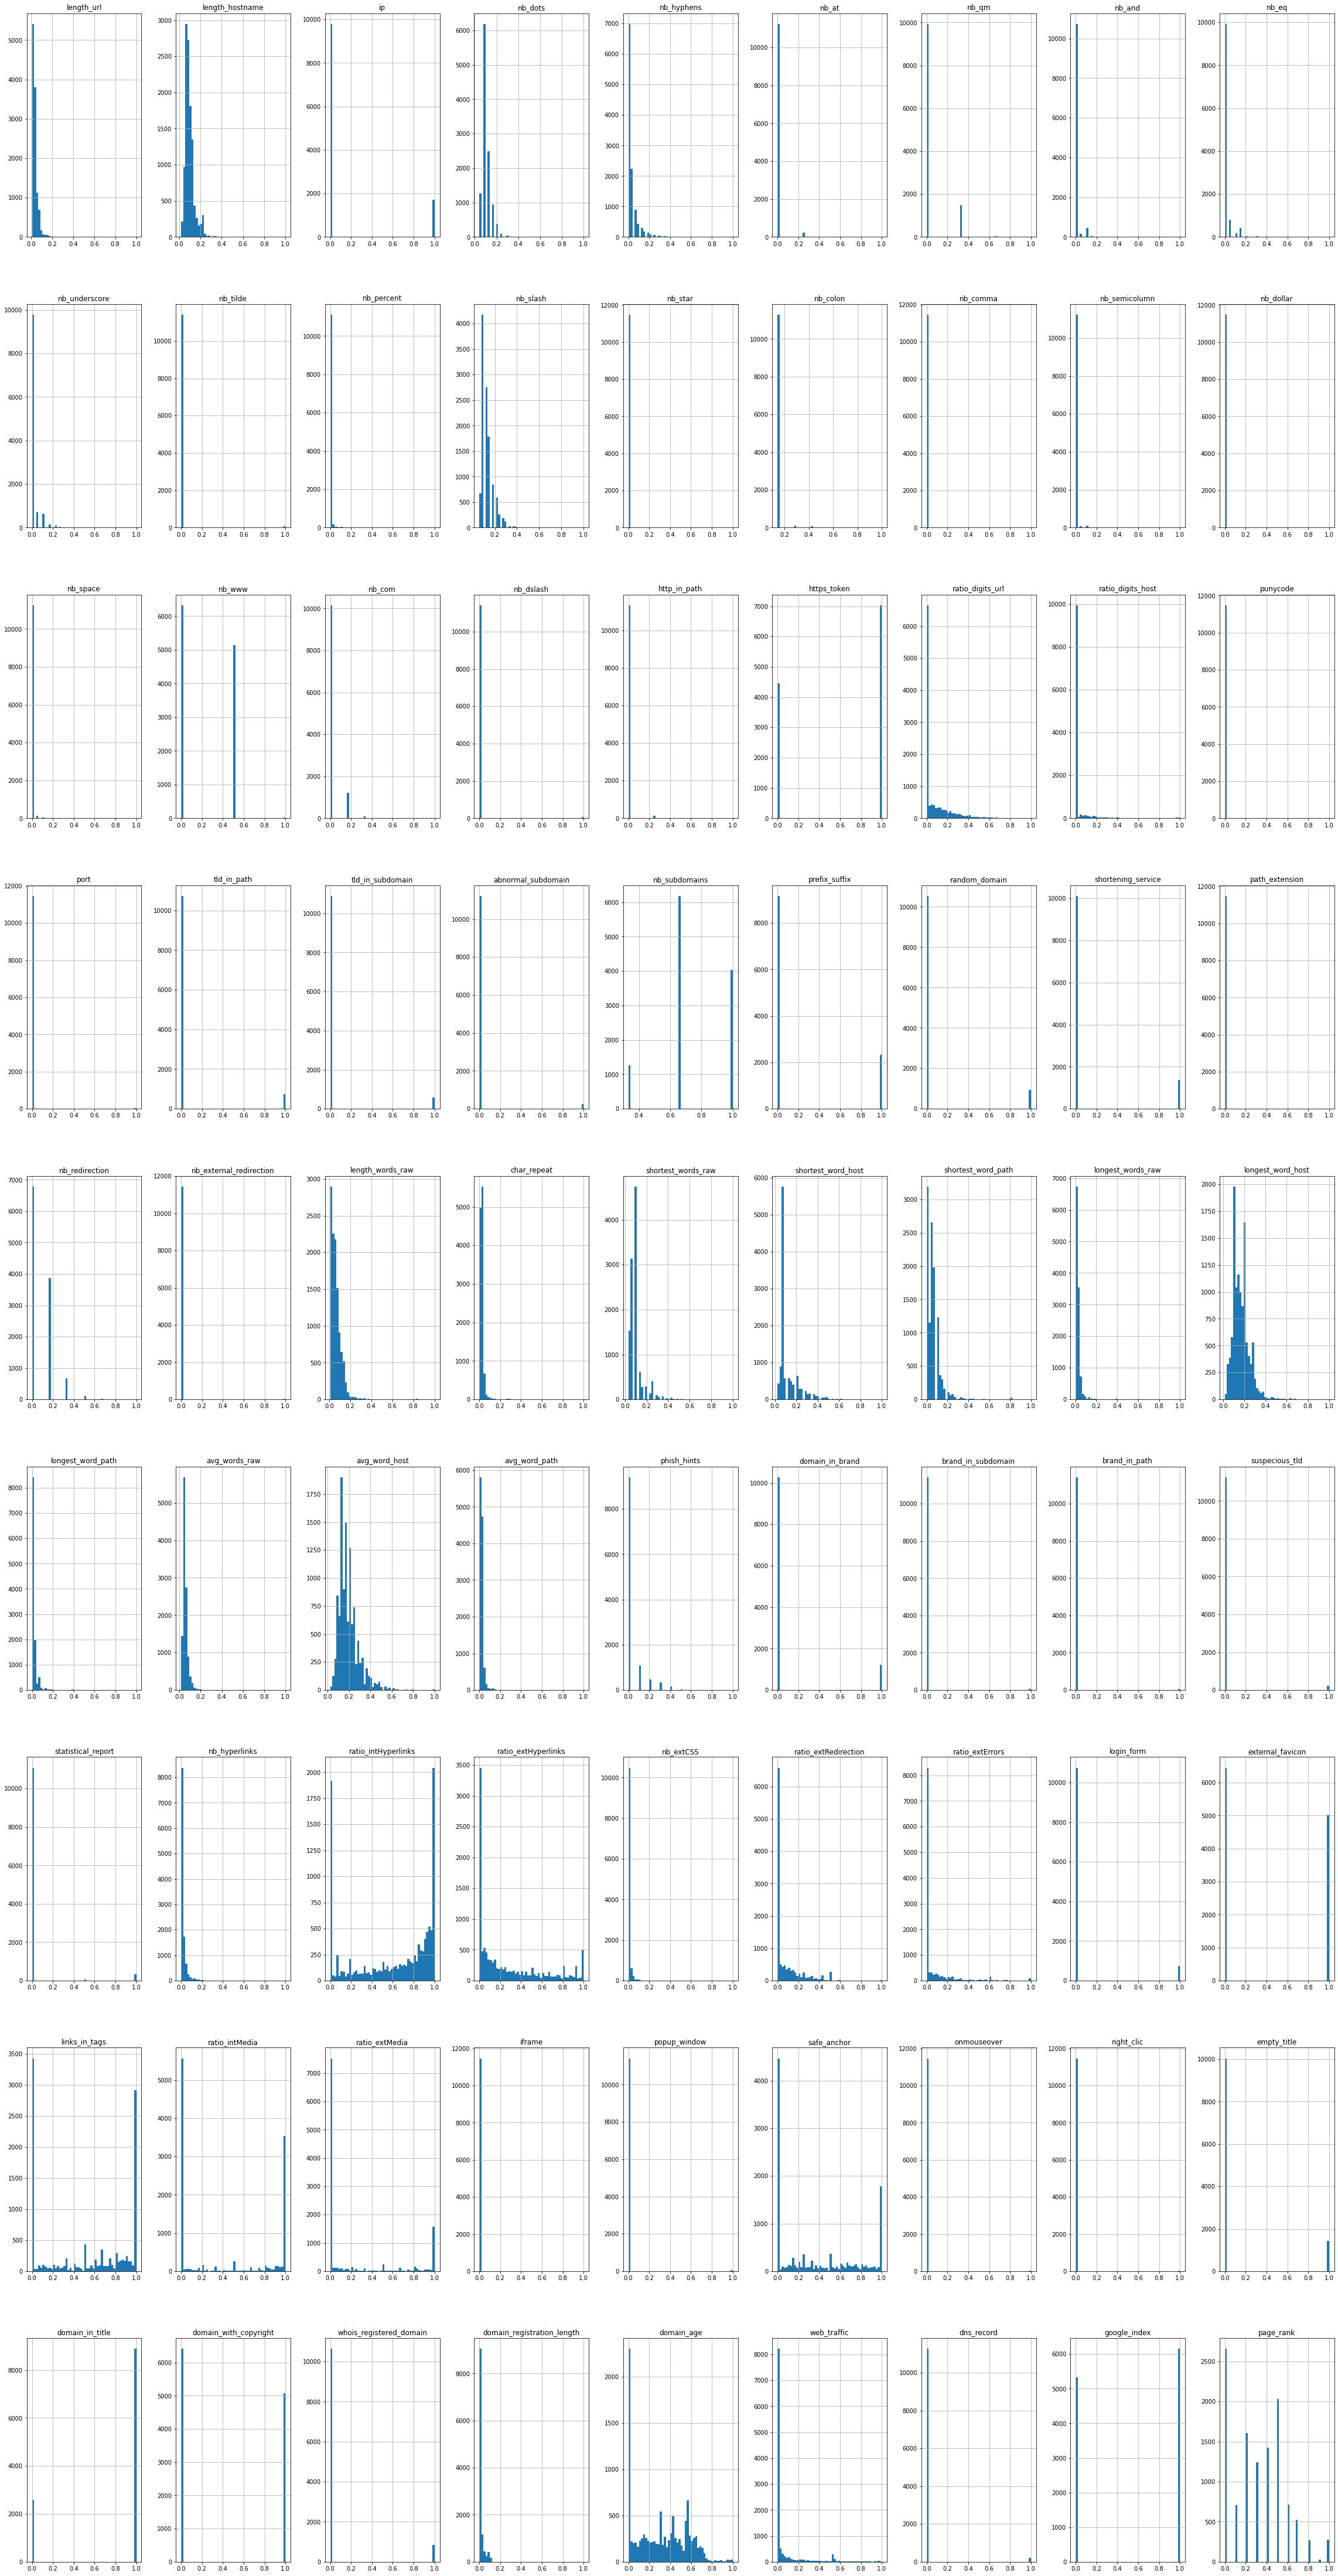

In [60]:
# plotting histogram for all the columns
data.hist(bins = 50, figsize = (40,80))
plt.show()

In [24]:
# label encoding the categorical data
# in this case only the dependent variable (the last column of the datset)
y = pd.get_dummies(df['status'], prefix='type')
# we 1 of the columns as only 1 column can serve our purpose
y = y.drop(['type_phishing'], axis = 1)

In [25]:
# splitting the dataset into train and test split

# taking all the columns except the last column
x = data.iloc[:, :-1]

# importing required modules from sklearn for train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [26]:
x.shape

(11481, 81)

In [27]:
y.shape

(11481, 1)

# Applying Artificial Neural Network

In [28]:
model = kf.models.Sequential()
model.add(kf.layers.Dense(1000, input_dim = x.shape[1], activation='relu'))
model.add(kf.layers.Dense(2000, activation='relu'))
model.add(kf.layers.Dense(3000, activation='relu'))
model.add(kf.layers.Dense(2000, activation='relu'))
model.add(kf.layers.Dense(1000, activation='relu'))
model.add(kf.layers.Dense(1, activation='sigmoid'))

In [29]:
model.compile(
optimizer = 'adam',
loss = 'binary_crossentropy',
metrics = ['accuracy']
)

In [30]:
history = model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
287/287 [==============================] - 24s 81ms/step - loss: 0.2869 - accuracy: 0.8895
Epoch 2/3
287/287 [==============================] - 24s 84ms/step - loss: 0.1356 - accuracy: 0.9486
Epoch 3/3
287/287 [==============================] - 24s 82ms/step - loss: 0.0997 - accuracy: 0.9654


In [45]:
# evaluating the model on test set
model.evaluate(x_test, y_test)

72/72 [==============================] - 1s 15ms/step - loss: 0.1434 - accuracy: 0.9591


[0.1434277594089508, 0.9590770602226257]

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              82000     
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              2002000   
_________________________________________________________________
dense_2 (Dense)              (None, 3000)              6003000   
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              6002000   
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1001      
Total params: 16,091,001
Trainable params: 16,091,001
Non-trainable params: 0
____________________________________________

In [33]:
# saving the model
model.save("model_ann_without_outlier.h5")

Train: 0.968, Test: 0.959


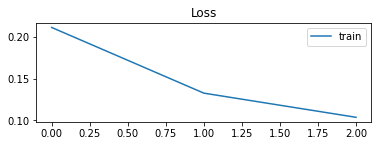

In [53]:
# evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
plt.legend()

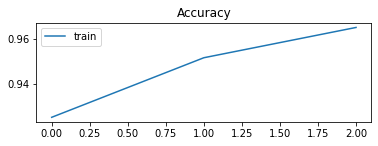

In [52]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
# plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# Working on saved model

In [34]:
# importing required functions for loading the model
from tensorflow.keras.models import load_model

In [35]:
# loading the saved
saved_model = load_model("model_ann_without_outlier.h5")

In [36]:
# printing the summary of the loaded model
saved_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              82000     
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              2002000   
_________________________________________________________________
dense_2 (Dense)              (None, 3000)              6003000   
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              6002000   
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1001      
Total params: 16,091,001
Trainable params: 16,091,001
Non-trainable params: 0
____________________________________________

In [37]:
# predicting using the saved model
predictions = saved_model.predict(x_test)

In [38]:
# rounding of the predicted values
predictions_round_figure = np.round(predictions)

In [39]:
predictions_round_figure.astype('int32')

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [1]])

In [40]:
y_test

,type_legitimate
2021,0
3288,0
11122,1
5294,0
7874,1
...,...
6010,1
10660,0
10566,0
8003,1


In [41]:
predictions

array([[1.8994856e-10],
       [1.9814363e-05],
       [9.9833667e-01],
       ...,
       [1.9871622e-02],
       [9.9304128e-01],
       [9.9476016e-01]], dtype=float32)

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [43]:
cnm = confusion_matrix(y_test, predictions_round_figure)

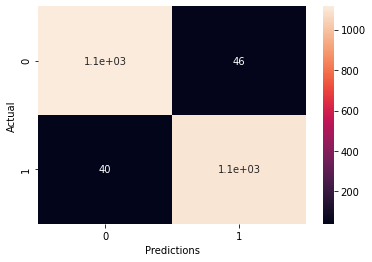

In [44]:
# using heatmap for plotting confusion matrix
sn.heatmap(cnm, annot=True)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()

# Analysis of performance of the model

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

In [58]:
# making a variable same as predictions
yhat_probs = predictions

# predict crisp classes for test sett
yhat_classes = model.predict_classes(x_test, verbose=0)
# reduce to 1d array
yhat_probs = predictions
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
# auc = roc_auc_score(y_test, yhat_probs)
# print('ROC AUC: %f' % auc)

d:\project\data_science\data_science\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy: 0.959077
Precision: 0.969369
Recall: 0.947183
F1 score: 0.958148
Cohens kappa: 0.918124
